In [2]:
import matplotlib.pyplot as plt

In [21]:
%matplotlib inline

In [4]:
import numpy as np

In [5]:
data = np.arange(10)

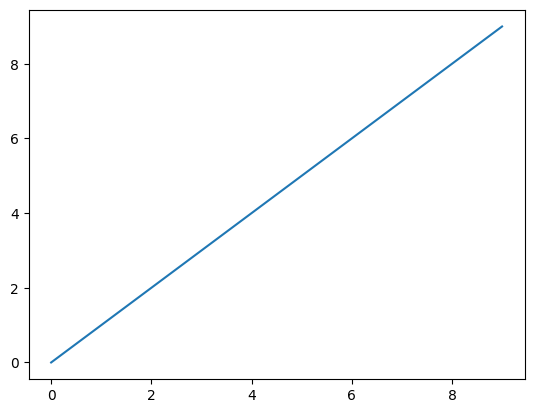

In [13]:
plt.plot(data)

<Figure size 640x480 with 0 Axes>

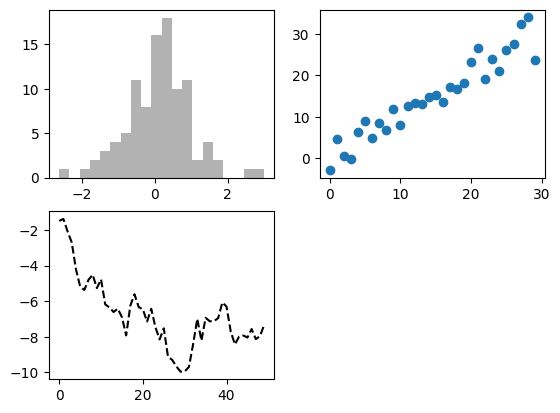

In [24]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax1.hist(np.random.standard_normal(100), bins=20, color="black", alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30))
ax3.plot(np.random.standard_normal(50).cumsum(), color="black", linestyle="dashed")

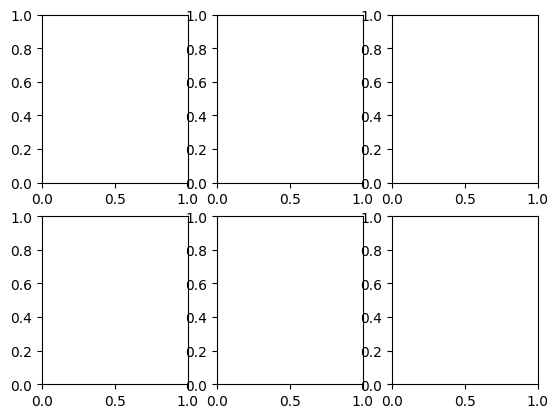

In [25]:
fig, axes = plt.subplots(2, 3)

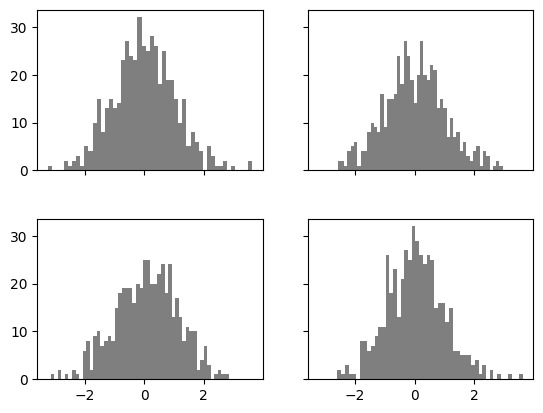

In [29]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.standard_normal(500), bins=50,
                        color="black", alpha=0.5)
fig.subplots_adjust(wspace=0.2, hspace=0.3)

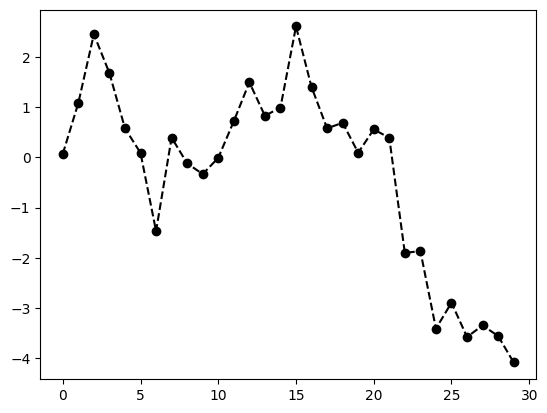

In [31]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(np.random.standard_normal(30).cumsum(), color="black",         linestyle="dashed", marker="o")

Text(50, 50, 'Hello world!')

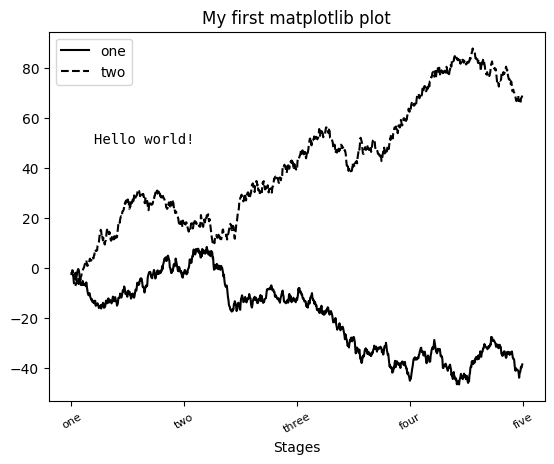

In [41]:
fig, ax = plt.subplots()

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(["one", "two", "three", "four", "five"], rotation=30, fontsize=8)

ax.set_xlabel("Stages")
ax.set_title("My first matplotlib plot")


ax.plot(np.random.standard_normal(1000).cumsum(),  color="black", label="one")
ax.plot(np.random.randn(1000).cumsum(), color="black", linestyle="dashed", label="two")

ax.legend()

ax.text(50, 50, "Hello world!",
        family="monospace", fontsize=10)

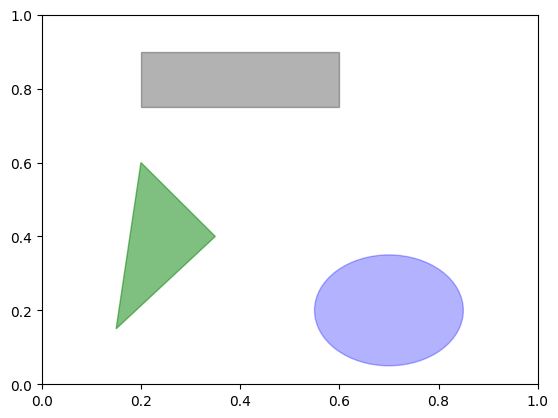

In [43]:
fig, ax = plt.subplots()

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="black", alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color="blue", alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color="green", alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)
fig.savefig("figpath.png", dpi=400)


In [45]:
import pandas as pd
import numpy as np
s = pd.Series(np.random.standard_normal(10).cumsum(), index=np.arange(0, 100, 10))

<Axes: >

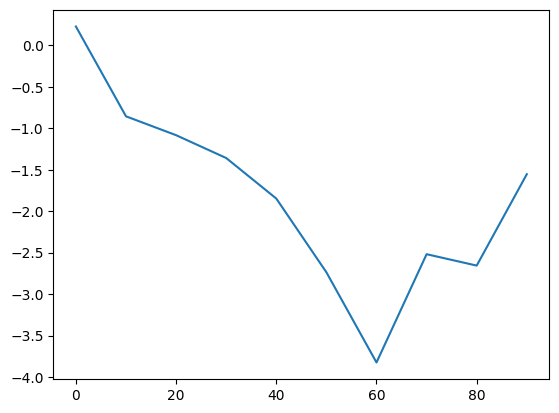

In [46]:
s.plot()

In [47]:
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(0),
   ....:                   columns=["A", "B", "C", "D"],
   ....:                   index=np.arange(0, 100, 10))

<Axes: >

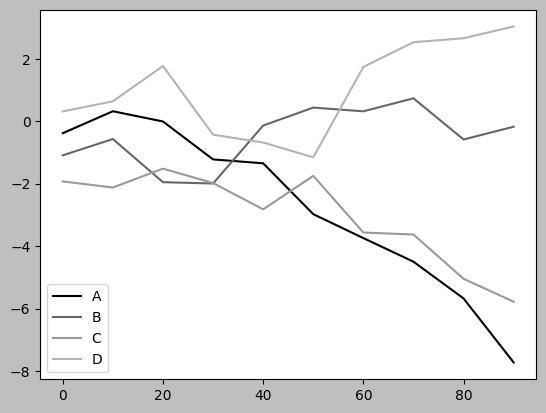

In [48]:
plt.style.use('grayscale')
df.plot()

<Axes: >

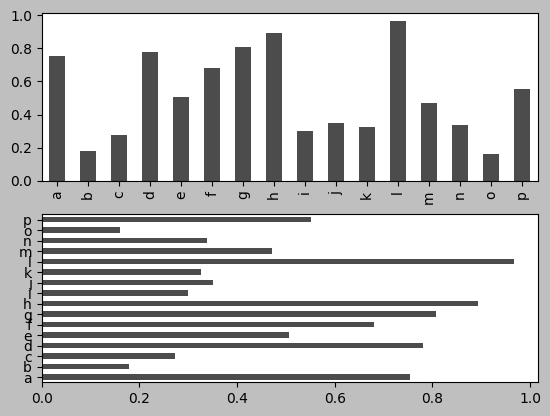

In [50]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.uniform(size=16), index=list("abcdefghijklmnop"))
data.plot.bar(ax=axes[0], color="black", alpha=0.7)
data.plot.barh(ax=axes[1], color="black", alpha=0.7)

<Axes: >

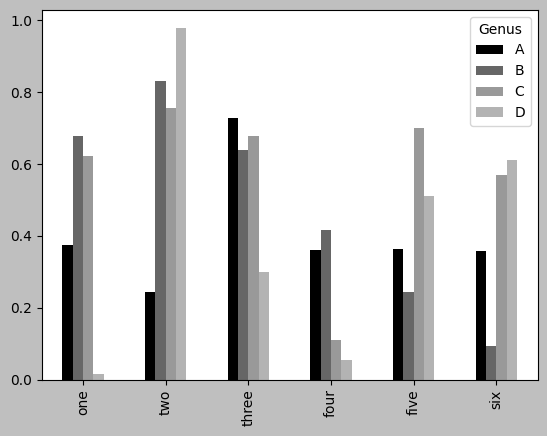

In [51]:
df = pd.DataFrame(np.random.uniform(size=(6, 4)),
   ....:                   index=["one", "two", "three", "four", "five", "six"],
   ....:                   columns=pd.Index(["A", "B", "C", "D"], name="Genus"))

df.plot.bar()

<Axes: >

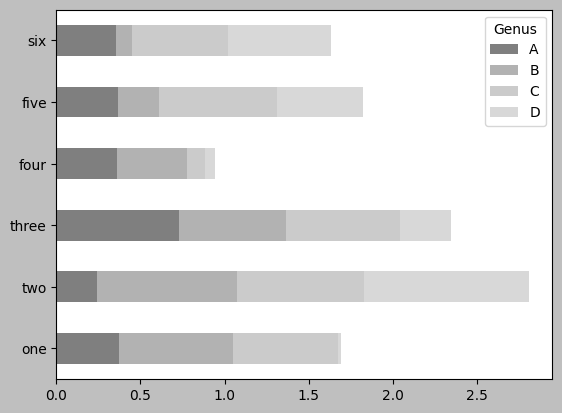

In [52]:
df.plot.barh(stacked=True, alpha=0.5)

In [53]:
import seaborn as sns

In [54]:
tips = pd.read_csv("examples/tips.csv")

In [55]:
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [60]:
party_counts = pd.crosstab(tips["day"], tips["size"])
party_counts = party_counts.reindex(index=["Thur", "Fri", "Sat", "Sun"])
party_counts = party_counts.loc[:, 2:5]

In [59]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [61]:
party_pcts = party_counts.div(party_counts.sum(axis="columns"),
   ....:                               axis="index")

In [62]:
party_pcts

size,2,3,4,5
day,,,,
Thur,0.827586,0.068966,0.086207,0.017241
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000


<Axes: xlabel='day'>

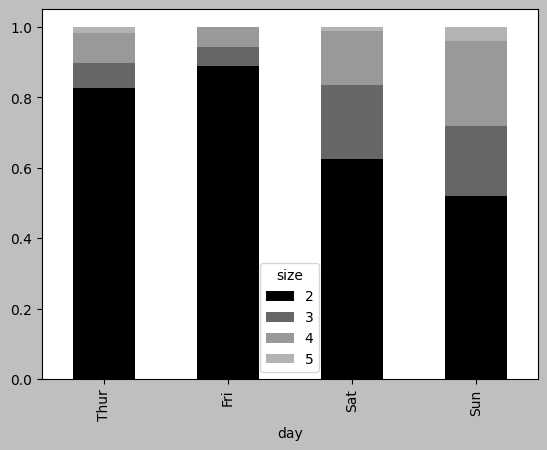

In [63]:
party_pcts.plot.bar(stacked=True)

In [64]:
 tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])

<Axes: xlabel='tip_pct', ylabel='day'>

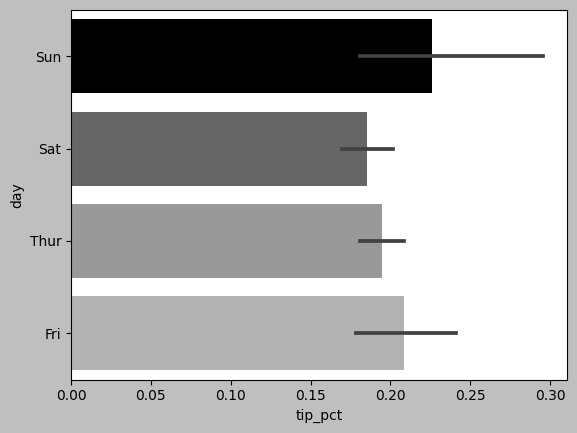

In [65]:
sns.barplot(x="tip_pct", y="day", data=tips, orient="h")

<Axes: xlabel='tip_pct', ylabel='day'>

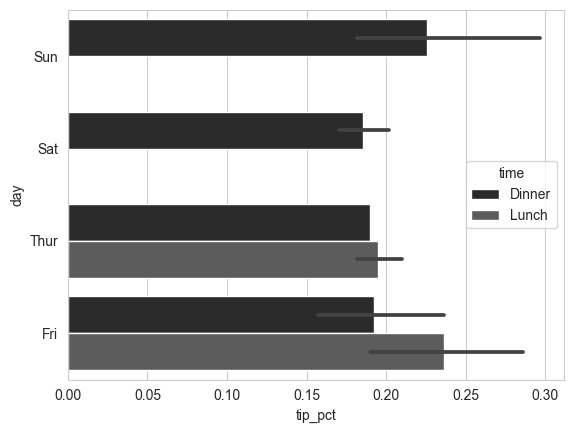

In [72]:
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h")


In [70]:
sns.set_palette("Greys_r")
sns.set_style("whitegrid")

<Axes: ylabel='Frequency'>

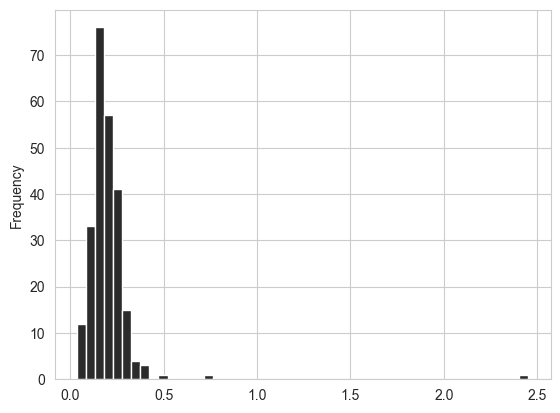

In [71]:
tips["tip_pct"].plot.hist(bins=50)

<Axes: ylabel='Density'>

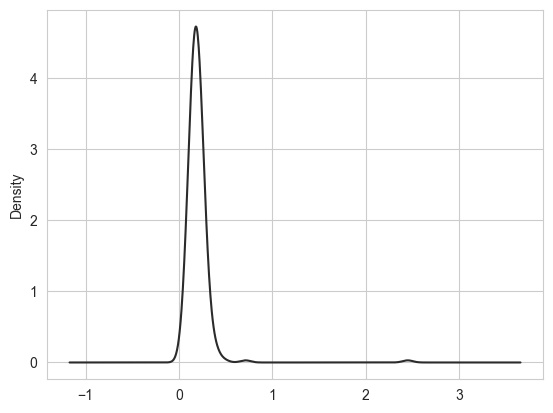

In [75]:
tips["tip_pct"].plot.density()

In [76]:
macro = pd.read_csv("examples/macrodata.csv")
data = macro[["cpi", "m1", "tbilrate", "unemp"]]
trans_data = np.log(data).diff().dropna()

Text(0.5, 1.0, 'Changes in log(m1) versus log(unemp)')

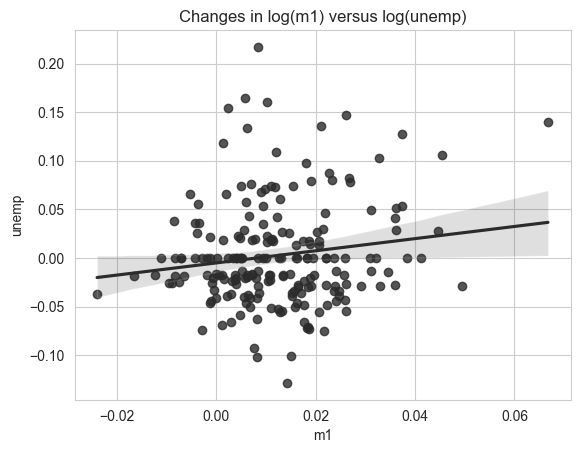

In [77]:
ax = sns.regplot(x="m1", y="unemp", data=trans_data)
ax.set_title("Changes in log(m1) versus log(unemp)")

/Users/charliethomas/Dev/PythonForDataAnalysis/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


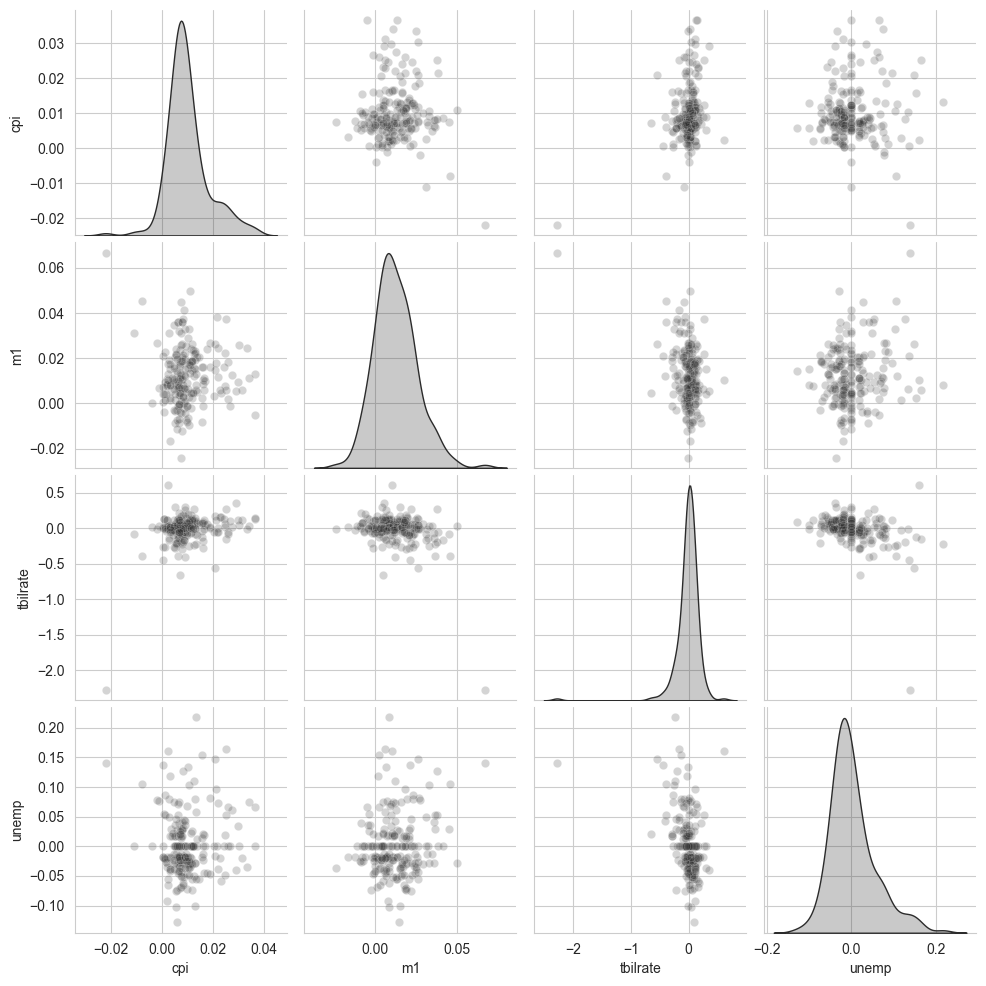

In [78]:
sns.pairplot(trans_data, diag_kind="kde", plot_kws={"alpha": 0.2})

/Users/charliethomas/Dev/PythonForDataAnalysis/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


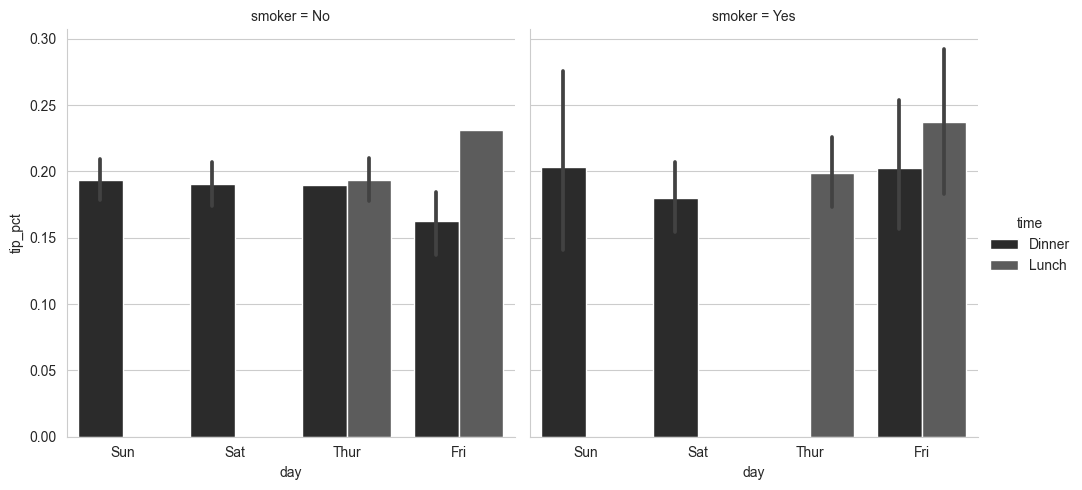

In [80]:
sns.catplot(x="day", y="tip_pct", hue="time", col="smoker",
   .....:             kind="bar", data=tips[tips.tip_pct < 1])

/Users/charliethomas/Dev/PythonForDataAnalysis/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


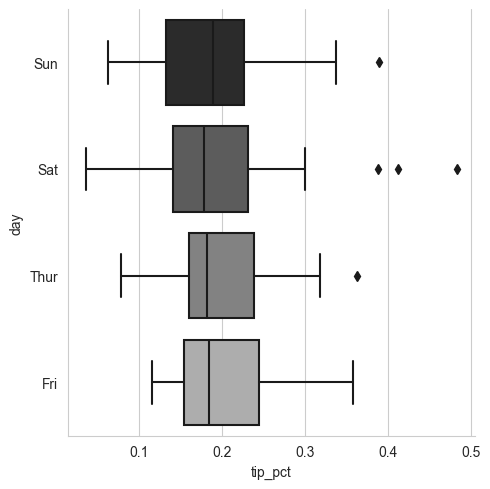

In [81]:
sns.catplot(x="tip_pct", y="day", kind="box",
   .....:             data=tips[tips.tip_pct < 0.5])